# MSE (Mean Square Error)
Error Cuadrático Medio

In [104]:
import numpy as np
from probability_helper import plot_normalized_histogram_sorted
from matplotlib import pyplot as plt
from scipy.stats import norm

## Dados los datos del ejercicio anterior:

### Lo cargamos

In [105]:
gran_danes_pesos = np.load('data/gran_danes_pesos.npy')

### Graficamos

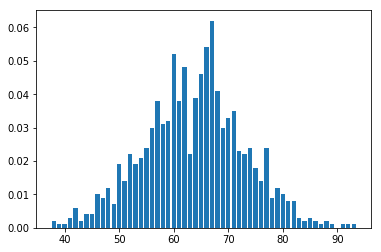

In [148]:
dens = 1
gran_danes_pesos_rounded = np.round(gran_danes_pesos*dens)/dens
espacio_muestral_2, probs_gran_danes_pesos_2 = plot_normalized_histogram_sorted(
    gran_danes_pesos_rounded)
probs_gran_danes_pesos_2 = probs_gran_danes_pesos_2*dens

### Modelizamos con una Gaussiana

In [149]:
media_MLE = gran_danes_pesos.mean()
std_MLE = gran_danes_pesos.std()

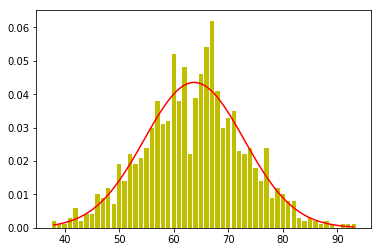

In [150]:
rango_pesos = np.linspace(espacio_muestral_2[0], espacio_muestral_2[-1], 100)
pdf_pesos = norm.pdf(rango_pesos, media_MLE, std_MLE)
plt.plot(rango_pesos, pdf_pesos, color='r')
plt.bar(espacio_muestral_2, probs_gran_danes_pesos_2, color='y')
plt.show()

### Como justificamos que calcular la media y el desvio estandar de los datos es la mejor estimación de Gaussiana?

In [151]:
media_MLE, std_MLE

(63.744769999999995, 9.1642462836340233)

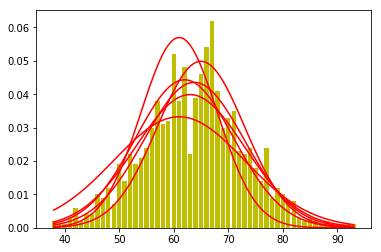

In [152]:
posibles_params = [(62, 9), (63, 10), (65, 8), (61, 12), (61, 7), (63.75, 9.16)]
for media_, std_ in posibles_params:
    pdf_pesos_ = norm.pdf(rango_pesos, media_, std_)
    plt.plot(rango_pesos, pdf_pesos_, color='r')
plt.bar(espacio_muestral_2, probs_gran_danes_pesos_2, color='y')
plt.show()

**La respuesta formal**: Se puede demostrar que esas formas de calcular la media y el desvio maximizan likelihood (verosimilitud) si supongo que todas las mediciones de pesos partieron de una distribución normal con la media y el desvio calculados

Esto quedará para más adelante ya que primero tenemos que definir que es el likelihood (verosimilitud)

## MSE

Dados:

$p(x=x_i)$ la función de densidad de probabilidad (La Roja)

$\hat{p}(x=x_i)$ El histograma como densidad (La amarilla)

$[p(x=x_i) - \hat{p}(x=x_i)]^2$ Error cuadrático de un punto

Promedio de error cuadrático de toda la curva:
\begin{equation}
\large
\frac{1}{N}\sum_{i=1}^N{[p(x=x_i) - \hat{p}(x=x_i)]^2}
\end{equation}

\begin{equation}
\large
\frac{1}{N}\sum_{i=1}^N{[N(\mu, \sigma) - \hat{p}(x=x_i)]^2}
\end{equation}

## MMSE

\begin{equation}
\large
argmin_{\mu, \sigma}\{\frac{1}{N}\sum_{i=1}^N{[N(\mu, \sigma) - \hat{p}(x=x_i)]^2}\}
\end{equation}

In [153]:
def MSE(params, espacio_muestral, probs):
    # paramas -> [mean, std]
    pdf = norm.pdf(espacio_muestral, params[0], params[1])
    return ((pdf - probs)**2).sum()

In [154]:
from scipy.optimize import minimize
res = minimize(lambda x: MSE(x, espacio_muestral_2, probs_gran_danes_pesos_2), [60, 3])
print(res)
media_MSE = res.x[0]
std_MSE = res.x[1]

      fun: 0.0017062117153590908
 hess_inv: array([[ 2632.67438098,   -44.19112247],
       [  -44.19112247,  2172.3824415 ]])
      jac: array([  1.51791028e-07,   1.90608262e-06])
  message: 'Optimization terminated successfully.'
     nfev: 108
      nit: 24
     njev: 27
   status: 0
  success: True
        x: array([ 63.91528636,   9.05816141])


In [155]:
print(media_MLE, std_MLE)
print(media_MSE, std_MSE)

63.74477 9.16424628363
63.9152863622 9.0581614108


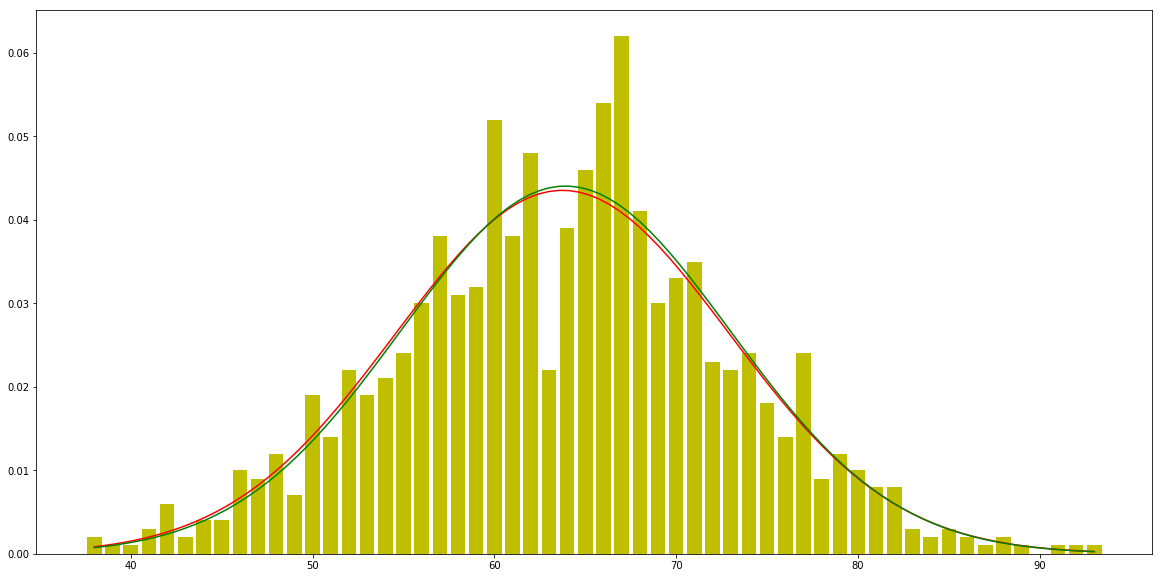

In [156]:
plt.figure(figsize=(20,10))
rango_pesos_ = np.linspace(espacio_muestral_2[0], espacio_muestral_2[-1], 100)
pdf_pesos = norm.pdf(rango_pesos_, media_MLE, std_MLE)
pdf_pesos_ = norm.pdf(rango_pesos_, media_MSE, std_MSE)
plt.plot(rango_pesos_, pdf_pesos, color='r')
plt.plot(rango_pesos_, pdf_pesos_, color='g')
plt.bar(espacio_muestral_2, probs_gran_danes_pesos_2, color='y')
plt.show()